In [3]:
import glob
import shutil
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import PIL

In [4]:
!gdown https://drive.google.com/file/d/1-zN14QNPd-xiYHFpiPyougkz5KZ5yOOs/view?usp=sharing --fuzzy -O archivo.zip

Downloading...
From (original): https://drive.google.com/uc?id=1-zN14QNPd-xiYHFpiPyougkz5KZ5yOOs
From (redirected): https://drive.google.com/uc?id=1-zN14QNPd-xiYHFpiPyougkz5KZ5yOOs&confirm=t&uuid=ea5a59b8-2250-4756-b24b-58f73dff9838
To: /content/archivo.zip
100% 3.85G/3.85G [01:37<00:00, 39.4MB/s]


In [5]:
!unzip archivo.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen

In [6]:
base_dir = os.path.join('fresh_or_rotten')

train_dir = os.path.join(base_dir, 'train')
train_img_dir = os.path.join(train_dir, 'images')
train_label_dir = os.path.join(train_dir, 'labels')

test_dir = os.path.join(base_dir, 'test')
test_img_dir = os.path.join(test_dir, 'images')
test_label_dir = os.path.join(test_dir, 'labels')

In [7]:
def create_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [8]:
create_dir(base_dir)

create_dir(train_dir)
create_dir(train_img_dir)
create_dir(train_label_dir)

create_dir(test_dir)
create_dir(test_img_dir)
create_dir(test_label_dir)

In [10]:
dataset_path = '/content/dataset/dataset'

In [11]:
fruit_count=[]
fruit_name=[]
for i in os.listdir(dataset_path+'/train'):
    fruit_name.append(i)
    fruit_count.append(len(os.listdir(os.path.join(dataset_path+'/train', i))))

In [12]:
fruit_df = pd.DataFrame({'fruit_name':fruit_name, 'fruit_count':fruit_count})

In [13]:
def get_image_range(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 0, 0], dtype = "uint8")
    upper = np.array([255, 50, 255], dtype = "uint8")
    img = cv2.inRange(img, lower, upper)
    img = cv2.blur(img, (2, 2))
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
    img = cv2.bitwise_not(thresh)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv2.contourArea(x))

    #get bounding box posotion
    xmin, ymin, xmax, ymax = cv2.boundingRect(contours)

    #get the original width,height of the image
    dimensions = img.shape
    h = img.shape[0]
    w = img.shape[1]

    #to calculate the bndBox info of this image for yolo
    xp = (xmin + (xmax-xmin)/2) * 1.0 / w
    yp = (ymin + (ymax-ymin)/2) * 1.0 / h
    wp = (xmax-xmin) * 1.0 / w
    hp = (ymax-ymin) * 1.0 / h
    return xp, yp, wp, hp

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 6.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [14]:
for dirname, _, filenames in os.walk(dataset_path):
    if dirname[1:].split('/')[-2]=='train':
        for img_path in glob.glob(dirname+'/*.png'):
            shutil.copy(img_path, os.path.join(train_img_dir, img_path.split('/')[-1]))
            label=0
            if img_path.split('/')[-2] == 'freshapples':
                label=0
            elif img_path.split('/')[-2] == 'freshbanana':
                label=1
            elif img_path.split('/')[-2] == 'freshoranges':
                label=2
            elif img_path.split('/')[-2] == 'rottenapples':
                label=3
            elif img_path.split('/')[-2] == 'rottenbanana':
                label=4
            elif img_path.split('/')[-2] == 'rottenoranges':
                label=5
            x_center, y_center, box_width, box_height = get_image_range(img_path)
            text = str(label)+' '+str(x_center)+' '+str(y_center)+' '+str(box_width)+' '+str(box_height)
            with open (os.path.join(train_label_dir, img_path.split('/')[-1][:-4]+'.txt'),'w') as file:
                file.write(text)

    if dirname[1:].split('/')[-2]=='test':
        for img_path in glob.glob(dirname+'/*.png'):
            shutil.copy(img_path, os.path.join(test_img_dir, img_path.split('/')[-1]))
            label=0
            if img_path.split('/')[-2] == 'freshapples':
                label=0
            elif img_path.split('/')[-2] == 'freshbanana':
                label=1
            elif img_path.split('/')[-2] == 'freshoranges':
                label=2
            elif img_path.split('/')[-2] == 'rottenapples':
                label=3
            elif img_path.split('/')[-2] == 'rottenbanana':
                label=4
            elif img_path.split('/')[-2] == 'rottenoranges':
                label=5
            x_center, y_center, box_width, box_height = get_image_range(img_path)
            text = str(label)+' '+str(x_center)+' '+str(y_center)+' '+str(box_width)+' '+str(box_height)
            with open (os.path.join(test_label_dir, img_path.split('/')[-1][:-4]+'.txt'),'w') as file:
                file.write(text)

In [15]:
print(f'There are {len(os.listdir(train_img_dir))} train images')
print(f'There are {len(os.listdir(train_label_dir))} corresponding train labels\n')

print(f'There are {len(os.listdir(test_img_dir))} train images')
print(f'There are {len(os.listdir(test_label_dir))} corresponding test labels')

There are 10901 train images
There are 10901 corresponding train labels

There are 2698 train images
There are 2698 corresponding test labels


In [16]:
df = pd.DataFrame({'file':['train', 'test'], 'count':[len(os.listdir(train_img_dir)),len(os.listdir(test_img_dir))]})

In [22]:
for path in os.listdir(train_img_dir):
    if 'vertical_flip' in path:
        os.remove(os.path.join(train_img_dir, path))
    elif 'saltandpepper' in path:
        os.remove(os.path.join(train_img_dir, path))

In [23]:
for path in os.listdir(test_img_dir):
    if 'vertical_flip' in path:
        os.remove(os.path.join(test_img_dir, path))
    elif 'saltandpepper' in path:
        os.remove(os.path.join(test_img_dir, path))

In [24]:
for path in os.listdir(train_label_dir):
    if 'vertical_flip' in path:
        os.remove(os.path.join(train_label_dir, path))
    elif 'saltandpepper' in path:
        os.remove(os.path.join(train_label_dir, path))

In [25]:
for path in os.listdir(test_label_dir):
    if 'vertical_flip' in path:
        os.remove(os.path.join(test_label_dir, path))
    elif 'saltandpepper' in path:
        os.remove(os.path.join(test_label_dir, path))

In [27]:
print(f'There are {len(os.listdir(train_img_dir))} train images')
print(f'There are {len(os.listdir(train_label_dir))} corresponding train labels\n')

print(f'There are {len(os.listdir(test_img_dir))} train images')
print(f'There are {len(os.listdir(test_label_dir))} corresponding test labels')

There are 8501 train images
There are 8501 corresponding train labels

There are 2076 train images
There are 2076 corresponding test labels


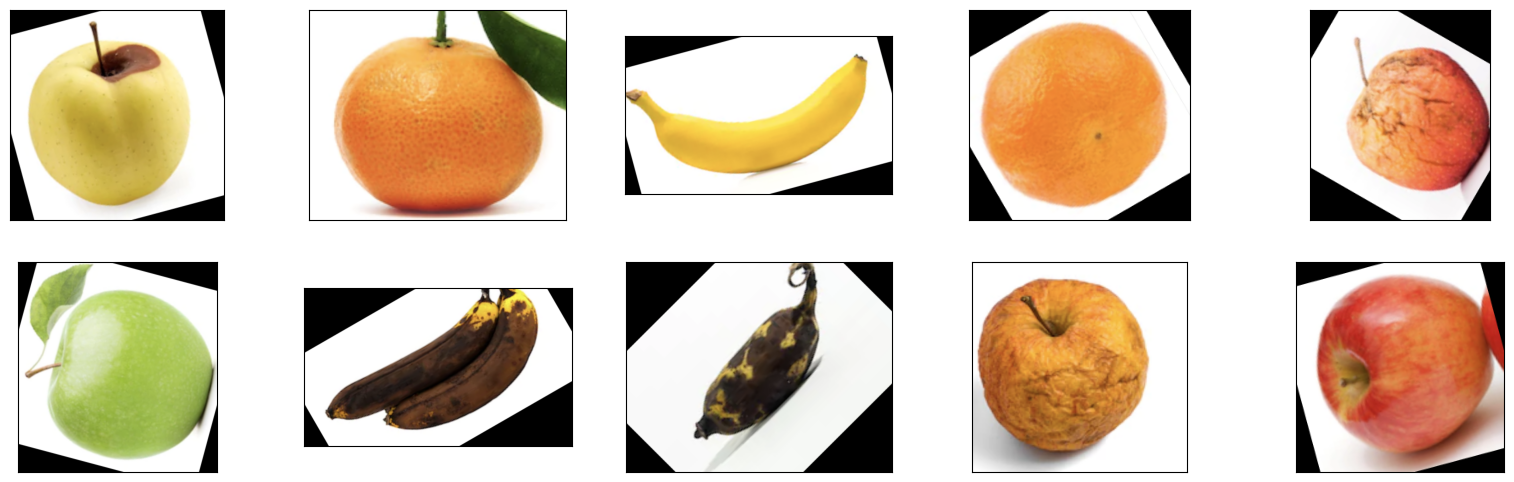

In [26]:
img_path=[]
selected_img = random.sample([i for i in os.listdir(train_img_dir)], 10)
for i in selected_img:
    img_path.append(os.path.join(train_img_dir, i))


fig, axes = plt.subplots(2,5, figsize=(20,6), subplot_kw=dict(xticks=[], yticks=[]))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(PIL.Image.open(img_path[i])))

In [18]:
yaml_file = """names:
- fresh_apples
- fresh_banana
- fresh_oranges
- rotten_apples
- rotten_banana
- rotten_oranges
nc: 6
train: /content/fresh_or_rotten/train/images
val: /content/fresh_or_rotten/test/images
"""

with open('data.yaml', 'w') as f:
    f.write(yaml_file)

In [19]:
with open(os.path.join(train_label_dir, os.listdir(train_label_dir)[0]),'r') as f:
    c = f.read()
    print(c)

3 0.42727272727272725 0.4860406091370558 0.6318181818181818 0.8959390862944162


In [20]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output
! yolo checks

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

numpy               ✅ 1.25.2<2.0.0,>=1.23.5
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


In [21]:
!pip install torch torchvision torchaudio

In [ ]:
model = YOLO('yolov8n.pt')

results = model.train(data = 'data.yaml', epochs = 100, imgsz = 640, device = 0)

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

train: Scanning /content/fresh_or_rotten/train/labels.cache... 8501 images, 0 backgrounds, 302 corrupt: 100%|██████████| 8501/8501 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/fresh_or_rotten/train/images/Screen Shot 2018-06-12 at 10.04.49 PM.png: ignoring corrupt image/label: negative label values [  -0.039474]
train: WARNING ⚠️ /content/fresh_or_rotten/train/images/Screen Shot 2018-06-12 at 11.22.36 PM.png: ignoring corrupt image/label: negative label values [    -0.1457]
train: WARNING ⚠️ /content/fresh_or_rotten/train/images/Screen Shot 2018-06-12 at 11.31.01 PM.png: ignoring corrupt image/label: negative label values [    -0.1215    -0.33824]
train: WARNING ⚠️ /content/fresh_or_rotten/train/images/Screen Shot 2018-06-12 at 11.31.24 PM.png: ignoring corrupt image/label: negative label values [   -0.36937]
train: WARNING ⚠️ /content/fresh_or_rotten/train/images/Screen Shot 2018-06-12 at 11.37.41 PM.png: ignoring corrupt image/label: negative label values [  -0.042683]
train: WARNING ⚠️ /content/fresh_or_rotten/train/images/Screen Shot 2018-06-12 at 11.39.19 PM.png: ignoring corrupt image/label: negative label values [   -0.11644

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/fresh_or_rotten/test/labels.cache... 2076 images, 0 backgrounds, 73 corrupt: 100%|██████████| 2076/2076 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/fresh_or_rotten/test/images/Screen Shot 2018-06-12 at 11.18.34 PM.png: ignoring corrupt image/label: negative label values [     -0.125]
val: WARNING ⚠️ /content/fresh_or_rotten/test/images/Screen Shot 2018-06-12 at 8.51.00 PM.png: ignoring corrupt image/label: negative label values [  -0.079096]
val: WARNING ⚠️ /content/fresh_or_rotten/test/images/Screen Shot 2018-06-12 at 8.52.16 PM.png: ignoring corrupt image/label: negative label values [   -0.27548]
val: WARNING ⚠️ /content/fresh_or_rotten/test/images/Screen Shot 2018-06-12 at 8.53.09 PM.png: ignoring corrupt image/label: negative label values [   -0.12088]
val: WARNING ⚠️ /content/fresh_or_rotten/test/images/Screen Shot 2018-06-12 at 8.54.00 PM.png: ignoring corrupt image/label: negative label values [  -0.053073]
val: WARNING ⚠️ /content/fresh_or_rotten/test/images/Screen Shot 2018-06-12 at 8.59.15 PM.png: ignoring corrupt image/label: negative label values [  -0.040404]
val: WARNING ⚠️ /content/fresh_or

Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.73G      1.167      2.675      1.677         17        640: 100%|██████████| 513/513 [03:40<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  73%|███████▎  | 46/63 [00:22<00:09,  1.80it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.18it/s]


                   all       2003       2003      0.596      0.576       0.58      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.4G       1.13      1.743      1.594         19        640: 100%|██████████| 513/513 [03:29<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:30<00:00,  2.06it/s]


                   all       2003       2003      0.711       0.68      0.743      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.38G      1.157      1.527      1.598         22        640: 100%|██████████| 513/513 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.77it/s]


                   all       2003       2003      0.678      0.728      0.719      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      1.169      1.383      1.591         14        640: 100%|██████████| 513/513 [03:23<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.48it/s]

                   all       2003       2003      0.755      0.789      0.806      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.38G      1.116      1.218      1.555         19        640: 100%|██████████| 513/513 [03:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.55it/s]

                   all       2003       2003      0.795      0.772      0.805      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G      1.061      1.138      1.507         21        640: 100%|██████████| 513/513 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.89it/s]


                   all       2003       2003      0.812      0.798      0.834      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.37G      1.039      1.084       1.49         19        640: 100%|██████████| 513/513 [03:32<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.78it/s]


                   all       2003       2003       0.79      0.821      0.864      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.38G      1.008      1.037      1.472         15        640: 100%|██████████| 513/513 [03:29<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.78it/s]

                   all       2003       2003      0.877      0.861      0.901      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.38G     0.9937     0.9922      1.455         16        640: 100%|██████████| 513/513 [03:29<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.86it/s]

                   all       2003       2003      0.824      0.842      0.876      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.38G     0.9732      0.973      1.445         22        640: 100%|██████████| 513/513 [03:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.78it/s]


                   all       2003       2003      0.812      0.827      0.868      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.37G     0.9553     0.9371      1.429         17        640: 100%|██████████| 513/513 [03:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.38it/s]

                   all       2003       2003      0.887      0.858      0.901      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.38G     0.9315      0.908      1.408         21        640: 100%|██████████| 513/513 [03:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.67it/s]

                   all       2003       2003      0.857      0.817      0.882      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.38G     0.9183     0.8962      1.397         18        640: 100%|██████████| 513/513 [03:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.64it/s]

                   all       2003       2003      0.911      0.881      0.919      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.38G     0.9032     0.8689      1.394         19        640: 100%|██████████| 513/513 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.50it/s]


                   all       2003       2003      0.877       0.86      0.901      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.37G     0.8892     0.8535      1.382         25        640: 100%|██████████| 513/513 [03:25<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.58it/s]

                   all       2003       2003      0.896      0.895      0.933      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.38G     0.8885     0.8459      1.379         15        640: 100%|██████████| 513/513 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.61it/s]

                   all       2003       2003      0.909       0.88      0.929      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G     0.8714     0.8288      1.363         17        640: 100%|██████████| 513/513 [03:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.85it/s]


                   all       2003       2003      0.899      0.881      0.932      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.38G     0.8583     0.8039      1.358         26        640: 100%|██████████| 513/513 [03:35<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.86it/s]


                   all       2003       2003        0.9      0.903      0.919      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.37G     0.8571     0.8076      1.355         17        640: 100%|██████████| 513/513 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.55it/s]


                   all       2003       2003      0.923      0.899      0.941      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.38G     0.8518     0.8033      1.355         23        640: 100%|██████████| 513/513 [03:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.63it/s]

                   all       2003       2003      0.938      0.897      0.945      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.38G     0.8351      0.774      1.338         21        640: 100%|██████████| 513/513 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.71it/s]


                   all       2003       2003      0.927      0.899      0.946      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.38G     0.8297     0.7624      1.332         25        640: 100%|██████████| 513/513 [03:31<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.88it/s]

                   all       2003       2003      0.921      0.899      0.942      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.37G     0.8166     0.7595      1.329         23        640: 100%|██████████| 513/513 [03:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.86it/s]


                   all       2003       2003      0.932      0.875      0.928      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.38G     0.8182     0.7549      1.328         18        640: 100%|██████████| 513/513 [03:23<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.69it/s]

                   all       2003       2003      0.943      0.889      0.946       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.38G     0.8108      0.735      1.322         19        640: 100%|██████████| 513/513 [03:30<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.72it/s]

                   all       2003       2003      0.915      0.904      0.944      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.38G     0.8057     0.7339      1.318         15        640: 100%|██████████| 513/513 [03:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.80it/s]

                   all       2003       2003      0.933      0.914      0.946      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.37G     0.7931     0.7254      1.307         20        640: 100%|██████████| 513/513 [03:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.60it/s]

                   all       2003       2003      0.938      0.903      0.949       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.38G     0.7924     0.7206      1.309         17        640: 100%|██████████| 513/513 [03:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.75it/s]


                   all       2003       2003      0.933      0.922      0.953      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.38G     0.7826     0.6995        1.3         21        640: 100%|██████████| 513/513 [03:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.58it/s]

                   all       2003       2003      0.946      0.906       0.95      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.38G     0.7933     0.7098      1.308         20        640: 100%|██████████| 513/513 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.81it/s]


                   all       2003       2003      0.942       0.92      0.955      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.37G     0.7754     0.7071      1.297         22        640: 100%|██████████| 513/513 [03:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.87it/s]

                   all       2003       2003      0.936      0.922      0.952      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.38G     0.7743     0.6914      1.295         28        640: 100%|██████████| 513/513 [03:29<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.91it/s]


                   all       2003       2003      0.943      0.921      0.954      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.38G     0.7672     0.6817      1.291         23        640: 100%|██████████| 513/513 [03:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.62it/s]

                   all       2003       2003      0.954      0.916      0.956      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.38G     0.7639     0.6798      1.283         16        640: 100%|██████████| 513/513 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.96it/s]

                   all       2003       2003      0.955       0.92      0.957      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.37G      0.762     0.6684      1.288         25        640: 100%|██████████| 513/513 [03:26<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.93it/s]

                   all       2003       2003      0.938      0.925      0.954       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.38G      0.755     0.6692       1.28         16        640: 100%|██████████| 513/513 [03:32<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.79it/s]

                   all       2003       2003      0.946      0.931      0.961      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.38G     0.7507     0.6612      1.275         20        640: 100%|██████████| 513/513 [03:26<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.86it/s]


                   all       2003       2003      0.945      0.924      0.959      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.38G     0.7543     0.6647      1.278         20        640: 100%|██████████| 513/513 [03:25<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.66it/s]

                   all       2003       2003      0.943      0.924      0.955      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.37G     0.7505       0.66      1.276         16        640: 100%|██████████| 513/513 [03:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.62it/s]

                   all       2003       2003      0.958      0.926      0.964      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.38G     0.7341     0.6497      1.263         17        640: 100%|██████████| 513/513 [03:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.96it/s]


                   all       2003       2003      0.961      0.928      0.964       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.38G     0.7355     0.6415      1.262         16        640: 100%|██████████| 513/513 [03:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.70it/s]

                   all       2003       2003      0.945      0.935      0.961      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G     0.7326     0.6315      1.263         20        640: 100%|██████████| 513/513 [03:23<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:28<00:00,  2.17it/s]

                   all       2003       2003      0.954      0.929      0.959      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.37G     0.7327      0.639      1.262         17        640: 100%|██████████| 513/513 [03:29<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.90it/s]


                   all       2003       2003      0.962      0.937      0.967      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.37G     0.6947     0.6156      1.228         42        640:   6%|▌         | 31/513 [00:10<03:41,  2.17it/s]